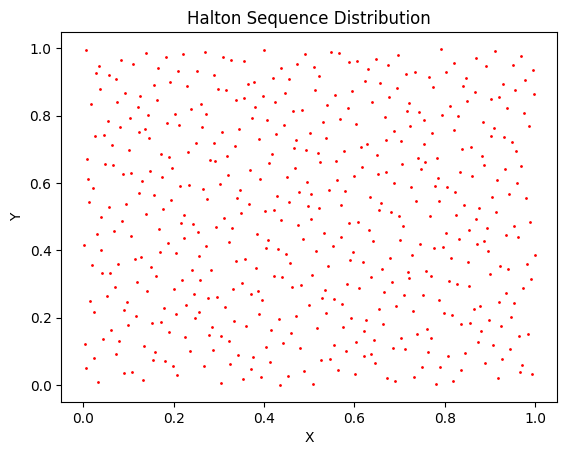

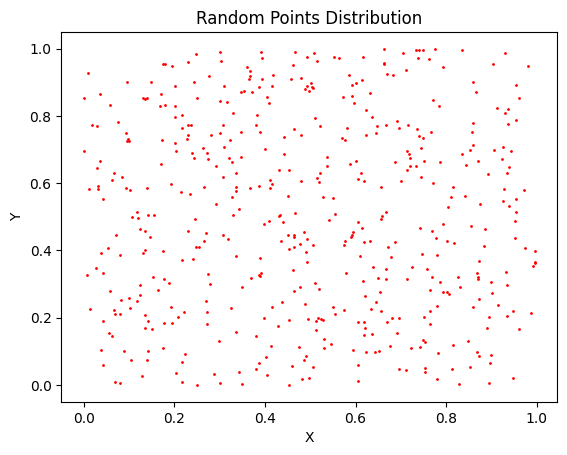

Halton Points: Mean pairwise distance: 0.002876978
Halton Points: Standard deviation of distances: 0.000534026
Random Points: Mean pairwise distance: 0.0032241195
Random Points: Standard deviation of distances: 0.0023467361


In [11]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from scipy.stats.qmc import Halton
from jax import random

## Comparing JAX random and Halton Sequence Points in a 2D [0,1] Space

# Halton sequence
def generate_halton_points(dim, tot_points):
    s = Halton(d=dim)
    points = s.random(n=tot_points)
    return jnp.array(points)

# Jax random
def generate_random_points(key, dim, tot_points):
    return random.uniform(key, shape=(tot_points, dim))

# Plotting
def plot_points(points, title):
    plt.scatter(points[:, 0], points[:, 1], s=1, color='red')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Check distribution using pairwise distances with JAX
def check_distribution(points):
    sorted_points = jnp.sort(points, axis=0)
    diffs = jnp.diff(sorted_points, axis=0)
    distances = jnp.sqrt(jnp.sum(diffs**2, axis=1))
    mean_distance = jnp.mean(distances)
    std_distance = jnp.std(distances)
    return mean_distance, std_distance


dim = 2
tot_points = 500

# Halton points
halton_points = generate_halton_points(dim, tot_points)

# JAX random points
key = random.PRNGKey(0)
random_points = generate_random_points(key, dim, tot_points)

# Plot : Halton points
plot_points(halton_points, 'Halton Sequence Distribution')
mean_distance_halton, std_distance_halton = check_distribution(halton_points)

# Plot : random points
plot_points(random_points, 'Random Points Distribution')
mean_distance_random, std_distance_random = check_distribution(random_points)

# Printing the pairwise distance and standard deviation
print("Halton Points: Mean pairwise distance:", mean_distance_halton)
print("Halton Points: Standard deviation of distances:", std_distance_halton)
print("Random Points: Mean pairwise distance:", mean_distance_random)
print("Random Points: Standard deviation of distances:", std_distance_random)